# Lead scoring dataset EDA, Data cleaning, Model tuning & Model selection

## 1. EDA and Data Cleaning

In [2]:
# imports

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/tmp/ipykernel_1507/2539880158.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# read the data
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
# number of records and features
data.shape

(4746, 12)

In [5]:
# Lets make column names a bit more consistent replacing spaces with _ and using lowercase
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(2)

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [6]:
# Lets transpose to see the columns better
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4736,4737,4738,4739,4740,4741,4742,4743,4744,4745
posted_on,2022-05-18,2022-05-13,2022-05-16,2022-07-04,2022-05-09,2022-04-29,2022-06-21,2022-06-21,2022-06-07,2022-06-20,...,2022-06-28,2022-07-07,2022-07-06,2022-07-06,2022-06-02,2022-05-18,2022-05-15,2022-07-10,2022-07-06,2022-05-04
bhk,2,2,2,2,2,2,2,1,2,2,...,3,3,2,2,2,2,3,3,3,2
rent,10000,20000,17000,10000,7500,7000,10000,5000,26000,10000,...,15000,15000,17000,25000,12000,15000,29000,35000,45000,15000
size,1100,800,1000,800,850,600,700,250,800,1000,...,1500,1500,855,1040,1350,1000,2000,1750,1500,1000
floor,Ground out of 2,1 out of 3,1 out of 3,1 out of 2,1 out of 2,Ground out of 1,Ground out of 4,1 out of 2,1 out of 2,1 out of 3,...,Lower Basement out of 2,Lower Basement out of 2,4 out of 5,2 out of 4,2 out of 2,3 out of 5,1 out of 4,3 out of 5,23 out of 34,4 out of 5
area_type,Super Area,Super Area,Super Area,Super Area,Carpet Area,Super Area,Super Area,Super Area,Carpet Area,Carpet Area,...,Super Area,Super Area,Carpet Area,Carpet Area,Super Area,Carpet Area,Super Area,Carpet Area,Carpet Area,Carpet Area
area_locality,Bandel,"Phool Bagan, Kankurgachi",Salt Lake City Sector 2,Dumdum Park,South Dum Dum,Thakurpukur,Malancha,Malancha,"Palm Avenue Kolkata, Ballygunge",Natunhat,...,Almasguda,Almasguda,"Godavari Homes, Quthbullapur",Gachibowli,Old Alwal,Bandam Kommu,"Manikonda, Hyderabad","Himayath Nagar, NH 7",Gachibowli,Suchitra Circle
city,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,...,Hyderabad,Hyderabad,Hyderabad,Hyderabad,Hyderabad,Hyderabad,Hyderabad,Hyderabad,Hyderabad,Hyderabad
furnishing_status,Unfurnished,Semi-Furnished,Semi-Furnished,Unfurnished,Unfurnished,Unfurnished,Unfurnished,Unfurnished,Unfurnished,Semi-Furnished,...,Semi-Furnished,Semi-Furnished,Unfurnished,Unfurnished,Unfurnished,Semi-Furnished,Semi-Furnished,Semi-Furnished,Semi-Furnished,Unfurnished
tenant_preferred,Bachelors/Family,Bachelors/Family,Bachelors/Family,Bachelors/Family,Bachelors,Bachelors/Family,Bachelors,Bachelors,Bachelors,Bachelors/Family,...,Family,Bachelors/Family,Bachelors,Bachelors,Bachelors/Family,Bachelors/Family,Bachelors/Family,Bachelors/Family,Family,Bachelors


We notice most features are categorical which means that we will need one hot-encoding and perhaps mapping for the area types, note that there is also a column with the date the ad was posted which we need to think if we will use depending on its impact

In [7]:
# some statistics for numerical values
data.describe().round()

,bhk,rent,size,bathroom
count,4746.0,4746.0,4746.0,4746.0
mean,2.0,34993.0,967.0,2.0
std,1.0,78106.0,634.0,1.0
min,1.0,1200.0,10.0,1.0
25%,2.0,10000.0,550.0,1.0
50%,2.0,16000.0,850.0,2.0
75%,3.0,33000.0,1200.0,2.0
max,6.0,3500000.0,8000.0,10.0


Lets see a boxplot of the rent price

In [8]:
# find NaNs in all columns
data.isnull().sum(axis=0)

posted_on            0
bhk                  0
rent                 0
size                 0
floor                0
area_type            0
area_locality        0
city                 0
furnishing_status    0
tenant_preferred     0
bathroom             0
point_of_contact     0
dtype: int64

The data looks clean in terms of NaNs

In [9]:
data.dtypes

posted_on            object
bhk                   int64
rent                  int64
size                  int64
floor                object
area_type            object
area_locality        object
city                 object
furnishing_status    object
tenant_preferred     object
bathroom              int64
point_of_contact     object
dtype: object

In [10]:
data['posted_on'] = pd.to_datetime(data.posted_on)

In [11]:
# Let's find the categorical columns

categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)

# and numerical columns as well
num_columns = list(data.dtypes[data.dtypes == 'int64'].index)

In [12]:
num_columns

['bhk', 'rent', 'size', 'bathroom']

/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/seaborn/cat

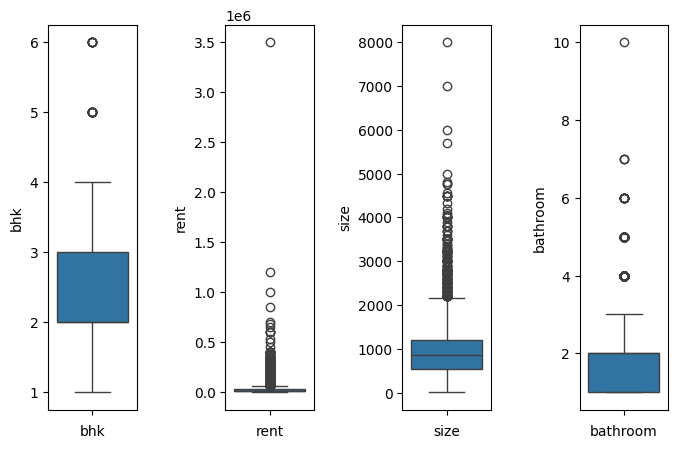

In [13]:
columns = num_columns 
fig, ax = plt.subplots(ncols = len(columns), figsize=(8,5))
plt.subplots_adjust(wspace = 1)
sns.set_palette("PRGn")
for i in range(0,len(columns)):
    s = sns.boxplot(ax = ax[i], data = data[columns[i]], showfliers = True)

    ax[i].set_xlabel(columns[i])

plt.show()

- The number of rooms bhk has the median coinciding with the median and hence the line is not showing
- The rent seems to have plenty of outliers which could be expected when taking into account fancy neighborhoods and houses where rent can increase significantly 
- As per the sizes the distribution seems to be symmetric if we dont consider the outliers, however there are still outliers of bigger houses, denoting more limited bigger houses available in the housing market
- For the bathroom feature the distribution seems to right skewed as well, whereas the mean and median coincide at 2

If we dont take into account outliers, (which removes the impact of the higher outlier rents) for the rent we can notice that the distribution is right skewed, which means that most of the houses lie on the lower rent side

/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='rent'>

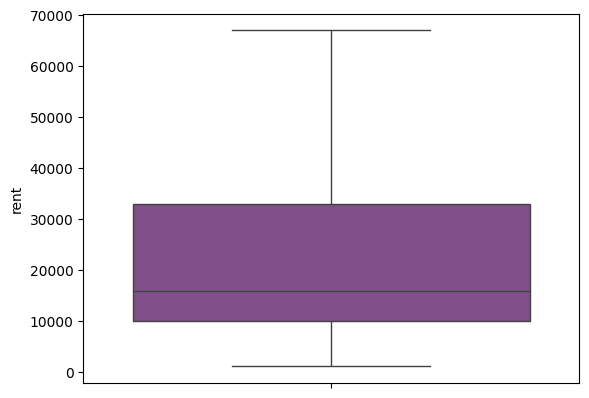

In [14]:
sns.boxplot(data['rent'], showfliers=False)

Since the dataset revolves around rent prices lets see their distribution

<Axes: xlabel='rent', ylabel='Count'>

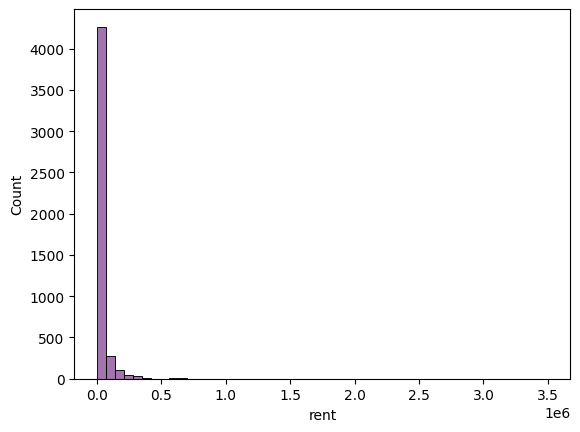

In [15]:
sns.histplot(x='rent', data = data, bins=50)

<Axes: xlabel='rent', ylabel='Count'>

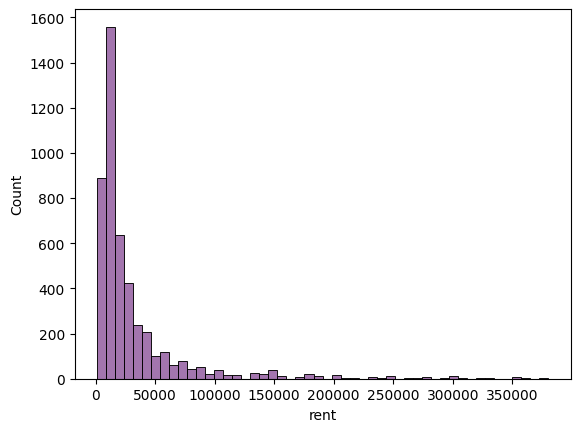

In [16]:
sns.histplot(data.rent[data.rent<0.4e6], bins =50)

We confirm that there is as expected a lot of rents on the lowest side, and there are a few (as we saw also in the boxplot) which fall into the higher range, the distribution is right skewed or a long tail distribution. For this reason it is better to take the logarithm, so large numbers in rent prices can be also seen and we also avoid "confusing" our models. Now the distribution looks more like a normal distribution. Keep in mind that models perform better when the target variable looks like this.

<Axes: xlabel='rent', ylabel='Count'>

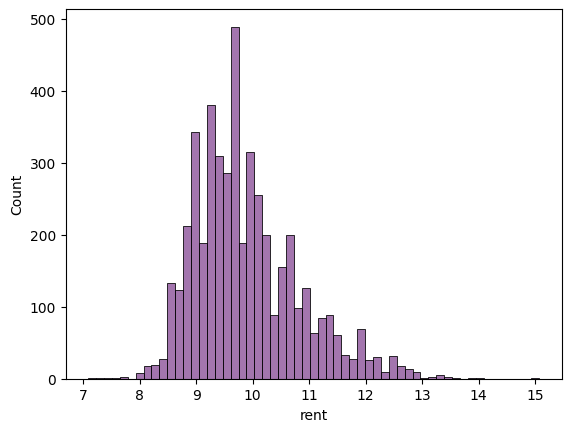

In [17]:
sns.histplot(np.log1p(data.rent))

What we can also do is to see how correlated are the numerical columns 

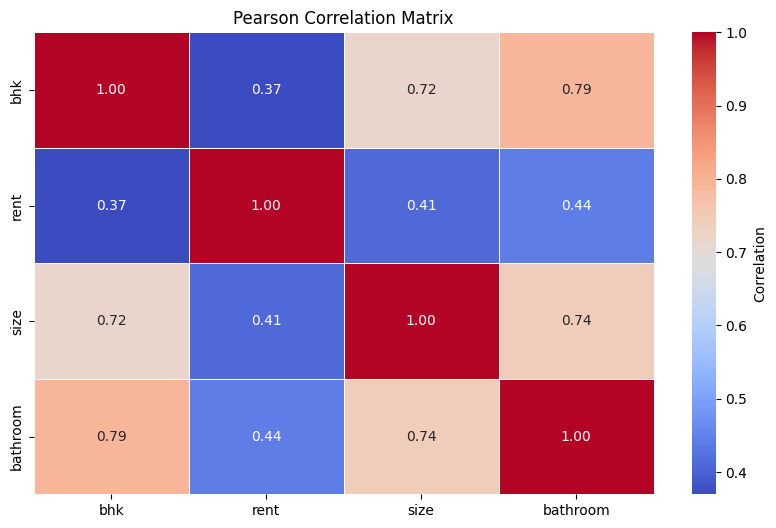

In [18]:
# Specify the column for which you want to calculate correlations


# Calculate Pearson correlation
correlation_matrix = data[num_columns].corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=.5,
            fmt='.2f',
            cbar_kws={'label': 'Correlation'})
plt.title('Pearson Correlation Matrix')
plt.show()

We expected to see some logical correlations, like we see in the heatmap for example the size has a higher correlation with bathroums and bhk, while a lower with rent which could be due to the fact that there could be big houses in less expensive areas for eg.  This could be an indicator that bhk could be not the best option for predicting rent prices. 
On another note, dropping correlated features to limit the dimensionality of the data is not really applicable  here since the dataset is pretty limited in the number of feature and thus lower correlated features with the target or features with correlation between them can be kept, even though we do not see numbers that indicate something like that.

Does the correlation change if we consider the log1p of the rent ?

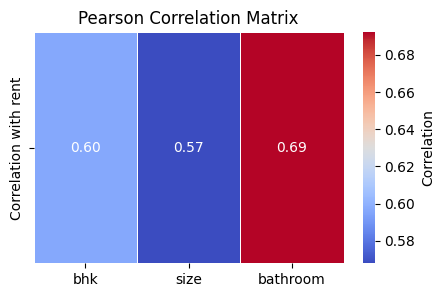

In [19]:
# Calculate Pearson correlation
correlation_matrix = data[num_columns].corrwith(np.log1p(data.rent))

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix.to_frame('Correlation with rent').T.drop(columns='rent'),
            annot=True,
            cmap='coolwarm',
            linewidths=.5,
            fmt='.2f',
            cbar_kws={'label': 'Correlation'})
plt.title('Pearson Correlation Matrix')
plt.show()

Correlation does change and we see that the numerical features have higher correlation values with the target variable rent, which could support the argument of our models performing better

**Data process**

In [20]:
# Lets make categorical data in columns consistent as well
for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ', '_')

For the categorical columns lets see the unique values in each of those and the NaNs

In [21]:
data[categorical_columns].nunique().sort_values(ascending=False)

area_locality        2231
floor                 480
city                    6
area_type               3
furnishing_status       3
tenant_preferred        3
point_of_contact        3
dtype: int64

The area locality feature and the floor have a lot of unique values which could make things hard when using one-hot-encoding, we might need to think of a better way to describe them if they impact the outcome, for e.g. we might use the top 4 of the unique values and add the keyword other for the rest. The other categorical features seem to have only a few unique values which means it is okay to use them for one-hot-encoding

In [22]:
# check the floor column
data.floor.value_counts().head(20)

floor
1_out_of_2         379
ground_out_of_2    350
2_out_of_3         312
2_out_of_4         308
1_out_of_3         293
3_out_of_4         239
ground_out_of_3    209
1_out_of_4         200
ground_out_of_1    195
1_out_of_1         134
2_out_of_2         132
ground_out_of_4    115
2_out_of_5         106
3_out_of_3          96
1_out_of_5          87
4_out_of_5          86
3_out_of_5          84
4_out_of_4          73
5_out_of_7          32
3_out_of_7          32
Name: count, dtype: int64

In [23]:
data.floor.value_counts().head(9).sum()

2485

This means that if for example we use the top 10 out of the floor options we would have described with the given naming convention more than half of the house listings (4746 in total) and we can use the word other for the rest, we can see that in a piechart as well, but in any case we need to see the feature importance as well. 
What we can also do for features with many unique values as in this case is to use the LabelEncoder and map each of the unique options to a different number. It might be interesting to see how that impacts the score of our models.

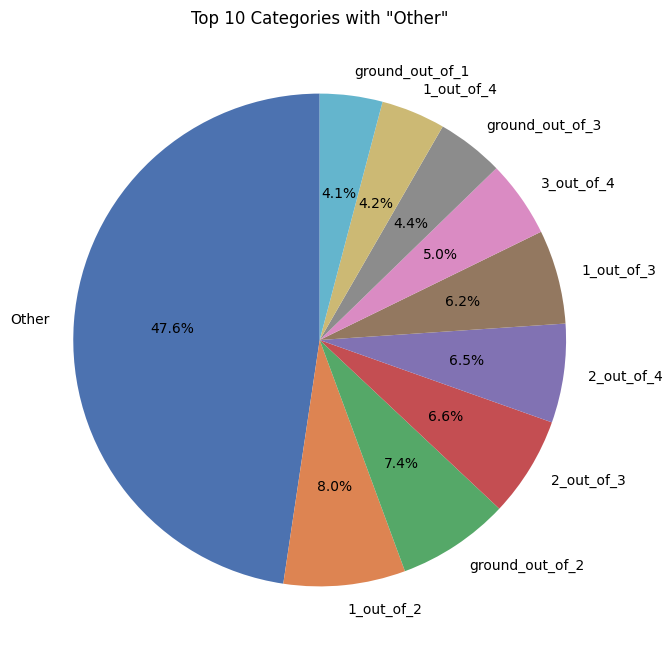

In [24]:
# Count the occurrences of each unique value

df_pie = pd.DataFrame(data.floor.copy())
value_counts = df_pie['floor'].value_counts()

# Select the top 4 values and group the rest as 'Other'
top_values = value_counts.head(9)
df_pie['floor'] = df_pie['floor'].where(df_pie['floor'].isin(top_values.index), 'Other')

# Count the occurrences again after grouping
new_value_counts = df_pie['floor'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 8))
plt.pie(new_value_counts, labels=new_value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))
plt.title('Top 10 Categories with "Other"')
plt.show()

Lets look at area_locality as well, which has over 2k unique values, meaning that on avg around two houses are on the same area and thus the option of using other is maybe not applicable, here label encoder might be a good option if we do not decide to drop the column due to minimal importance

In [25]:
data.area_locality.value_counts().mean() # shows that the above statement is true

2.127297176154191

In [26]:
data.area_locality.value_counts().head(20)

area_locality
bandra_west                           37
gachibowli                            29
electronic_city                       24
velachery                             22
miyapur,_nh_9                         22
madipakkam                            20
chembur                               19
laxmi_nagar                           19
k_r_puram                             19
kondapur                              18
banjara_hills,_nh_9                   17
iyyappanthangal                       17
medavakkam                            17
sholinganallur                        16
salt_lake_city_sector_2               16
chromepet,_gst_road                   15
vadapalani                            15
andheri_west                          15
salt_lake_city_sector_1               14
perungalathur,_chennai_bypass_road    14
Name: count, dtype: int64

Lets also check how time might affect the price through date posted 

(array([19097., 19113., 19127., 19144., 19158., 19174., 19188.]),
 [Text(19097.0, 0, '2022-04-15'),
  Text(19113.0, 0, '2022-05-01'),
  Text(19127.0, 0, '2022-05-15'),
  Text(19144.0, 0, '2022-06-01'),
  Text(19158.0, 0, '2022-06-15'),
  Text(19174.0, 0, '2022-07-01'),
  Text(19188.0, 0, '2022-07-15')])

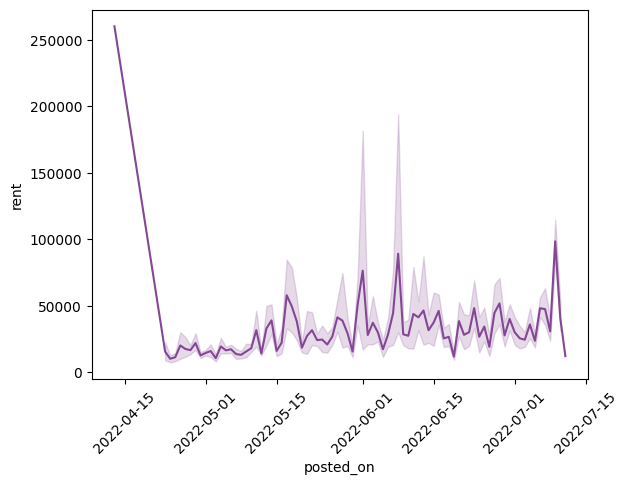

In [27]:
sns.lineplot(data=data, x='posted_on', y='rent')
plt.xticks(rotation=45)

Data appears to be from the same year and there is a bit of variation although that is around the same average value, with some peaks in specific months, maybe we can replace dates with months instead and do one-hot-encoding or label encoding. What could be good to also to is to replace with the ordinal number of the day in the year. Although if we want to have models that stay relevant, perhaps we should take into account that rent prices are affected actually by time and could increase or decrease (usually the former) over time due to for eg inflation, changes in an area etc. (Note: at least for the area we do have a feature that describes it that could also capture changes overtime)

For this approach let's impelement the Label Encoder to deal with the high cardinality of area locality and floor and apply it also for months after changing the posted date to the ordinal day of the year and to make things simpler lets also apply it for all categorical columns

**Data process**

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoded_columns = categorical_columns
le = LabelEncoder()

for column in label_encoded_columns:
    data[column] = le.fit_transform(data[column])

In [29]:
data.dtypes

posted_on            datetime64[ns]
bhk                           int64
rent                          int64
size                          int64
floor                         int64
area_type                     int64
area_locality                 int64
city                          int64
furnishing_status             int64
tenant_preferred              int64
bathroom                      int64
point_of_contact              int64
dtype: object

In [30]:
# Replacing the timestamp

data['posted_on'] = data['posted_on'].dt.dayofyear

In [31]:
data.dtypes

posted_on            int32
bhk                  int64
rent                 int64
size                 int64
floor                int64
area_type            int64
area_locality        int64
city                 int64
furnishing_status    int64
tenant_preferred     int64
bathroom             int64
point_of_contact     int64
dtype: object

Now we can make the split for train,val,test and do an analysis on feature importance that could limit our dataset further, all columns are now numerical 

## 2. Dataset split and feature importance

We can now split the data and perform some methods to assess feature importance

In [32]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42) 
df_train, df_val = train_test_split(df_full_train, test_size = 0.25 ,random_state = 42) 

We can use mutual info for regression to check quickly feature importance for a continuous target variable like the rent that we aim to predict here,
there are ways as well to test the feature importance based on models like the the random forest and check metrics like the decrease in impurity etc.

In [33]:
from sklearn.feature_selection import mutual_info_regression

def mutual_info_regression_score(feature, target):
    return mutual_info_regression(feature.values.reshape(-1, 1), target)

mi = df_full_train.apply(lambda feature: mutual_info_regression_score(feature, df_full_train['rent']))

mi = mi.drop(columns='rent')

mi.squeeze(axis=0).sort_values(ascending=False)

bathroom             0.338895
size                 0.324387
bhk                  0.257551
city                 0.234829
point_of_contact     0.230047
floor                0.206806
area_locality        0.134210
posted_on            0.084059
area_type            0.076014
furnishing_status    0.037060
tenant_preferred     0.015096
Name: 0, dtype: float64

We notice that out of the 11 features size comes first on its importance relative to the rent price, while the tenant_preferred option (that describes the type of tenant, bachelor, family etc.) has the lowest score. Since there are only 11 features we will keep the columns, it could be interesting to check how that affects performance.

In [34]:
df_full_train

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
1995,130,2,23500,950,377,2,310,0,1,1,2,2
1497,174,2,10500,800,289,2,1354,0,1,1,2,2
2763,164,1,19000,545,245,2,540,2,0,1,1,2
1351,188,1,20000,465,289,2,799,5,1,0,1,2
1862,185,2,17000,900,325,2,304,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,180,3,25000,1500,172,1,174,3,1,2,3,2
466,164,3,20000,1200,286,2,228,4,2,1,2,2
3092,187,2,20000,800,62,1,2106,1,1,2,2,0
3772,137,3,85000,3500,447,1,2009,1,1,1,3,0


Dropping the values for the target variable

In [35]:
y_train = np.log1p(df_train.rent.values)
y_val = np.log1p(df_val.rent.values)

y_test = np.log1p(df_test.rent.values)

# delete the target variable
del df_train['rent']
del df_val['rent']
del df_test['rent']


X_train = df_train.values
X_val = df_val.values

X_test = df_test.values

What happens with mutual info scores after applying the log ?

In [36]:
from sklearn.feature_selection import mutual_info_regression

def mutual_info_regression_score(feature, target):
    return mutual_info_regression(feature.values.reshape(-1, 1), target)

mi = df_train.apply(lambda feature: mutual_info_regression_score(feature, y_train))


mi.squeeze(axis=0).sort_values(ascending=False)

bathroom             0.359421
size                 0.355089
bhk                  0.263606
point_of_contact     0.236444
city                 0.231489
floor                0.222731
area_type            0.113017
posted_on            0.067101
area_locality        0.049145
furnishing_status    0.033914
tenant_preferred     0.020116
Name: 0, dtype: float64

Mi scores do not differ that much but some features come up higher in the ranking in some cases like bathroom and size

We can also assess importance through a random forest model

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'area_type'),
  Text(1, 0, 'tenant_preferred'),
  Text(2, 0, 'furnishing_status'),
  Text(3, 0, 'bhk'),
  Text(4, 0, 'floor'),
  Text(5, 0, 'posted_on'),
  Text(6, 0, 'area_locality'),
  Text(7, 0, 'city'),
  Text(8, 0, 'size'),
  Text(9, 0, 'bathroom'),
  Text(10, 0, 'point_of_contact')])

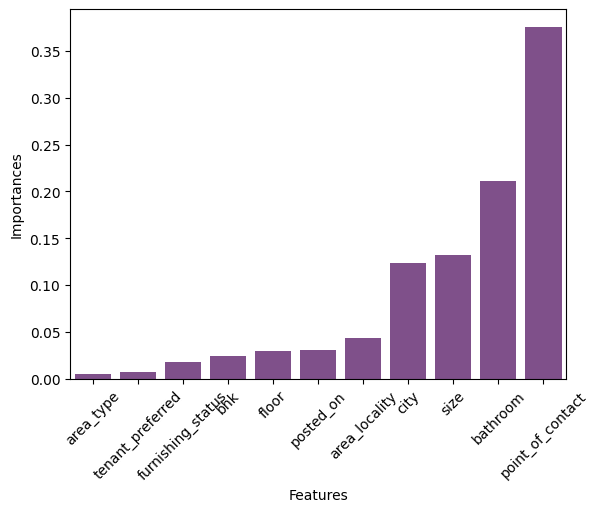

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)

importances = model.feature_importances_

df_im = pd.DataFrame({"Features": df_train.columns, 'Importances':importances})

df_im = df_im.sort_values('Importances')

sns.barplot(data = df_im, x ='Features', y='Importances')
plt.xticks(rotation=45)

Although, features that were highlighted at the higher ranks of the mutual info scores are still at the top here there is some shift in importances. A query with ChatGPT returned these as reasons behind:
- Non-linear relationships: Mutual information can capture non-linear relationships, while some models may not perform as well in capturing non-linear dependencies.
- Model-specific criteria: The model may be assigning higher importance to features based on its specific criteria, which may not perfectly align with the mutual information measure.
- Noise in the data: Mutual information may capture dependencies that are affected by noise, leading to differences in importance rankings.

Note: We need to remember that the feature selection could actually be a repetive process and that each model might perform better for a different set of features in the end. Due to the limited number of features here, we can see what different feature selection methods suggest but in the end we will be using the whole set of features.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'point_of_contact'),
  Text(1, 0, 'furnishing_status'),
  Text(2, 0, 'area_type'),
  Text(3, 0, 'tenant_preferred'),
  Text(4, 0, 'floor'),
  Text(5, 0, 'posted_on'),
  Text(6, 0, 'area_locality'),
  Text(7, 0, 'size'),
  Text(8, 0, 'city'),
  Text(9, 0, 'bhk'),
  Text(10, 0, 'bathroom')])

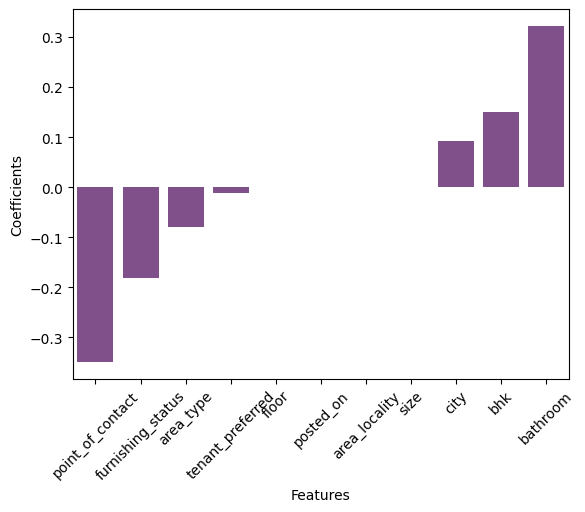

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
df_coeff = pd.DataFrame({"Features": df_train.columns, 'Coefficients':coefficients}).sort_values('Coefficients')

sns.barplot(df_coeff, x='Features', y='Coefficients')
plt.xticks(rotation=45)

We see the same top 2 features as the rf method showed, however size gets a really low value 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'area_locality'),
  Text(1, 0, 'tenant_preferred'),
  Text(2, 0, 'floor'),
  Text(3, 0, 'posted_on'),
  Text(4, 0, 'furnishing_status'),
  Text(5, 0, 'area_type'),
  Text(6, 0, 'city'),
  Text(7, 0, 'size'),
  Text(8, 0, 'bhk'),
  Text(9, 0, 'point_of_contact'),
  Text(10, 0, 'bathroom')])

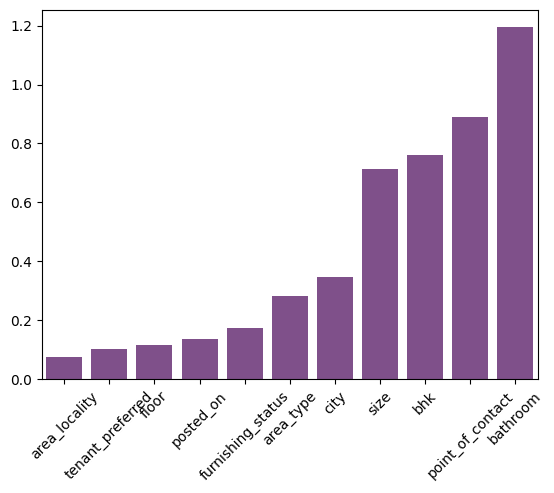

In [39]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(X_train, y_train)

feat_importances = pd.Series(ranks, df_train.columns)
feat_importances = feat_importances.sort_values()
sns.barplot(feat_importances)
plt.xticks(rotation=45)

Fisher's score show bhk being much higher than in the forest method but top 2 remain the same and size comes third close to bhk

## 3. Base Model training and comparison 

The plan is to train, test and compare 5 models for the rent price prediction. 
- Linear Regression
- Ridge regression  (linear with regularization)
- Decision Tree regressor
- Random forest regressor
- XGBregressor

We will be training the models and compare them without any tuning first to find out the best performers. We will do a comparison also after tuning.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
# Useful Functions
def train(df_train, y_train, model):
    
    X_train = df_train.values
    
    model.fit(X_train, y_train)
    
    return model

def predict(df, model):
   
    
    X = df.values
    y_pred = model.predict(X)
    
    return y_pred

def rmse(y_pred, y_val):
    score = float(mean_squared_error(y_pred, y_val))** 0.5 
    return score

Lets create a list of the methods and a list of the scores so we can make a comparison of the scores

In [42]:
models = ['Linear_Regression', 'Ridge_Regression', 'Decision_Tree_Regressor', 'Random_Forest_Regressor', 'XGB_regressor']
scores_mean = []
scores_std = []

### a. Linear Regression

In [43]:
lr = LinearRegression()
n_splits = 5 
scores = []
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    # data splitting
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
        
    # y values
    y_train = np.log1p(df_train.rent.values)
    y_val = np.log1p(df_val.rent.values)
    
    del df_train['rent']
    del df_val['rent']
        
    # training and predicting
    model = train(df_train, y_train, lr)
    y_pred = predict(df_val, model)
    
    score = rmse(y_pred, y_val)
    scores.append(score)
    
print('RMSE for model %s: %.5f +- %.5f' % (model, np.mean(scores), np.std(scores)))

5it [00:00, 279.78it/s]

RMSE for model LinearRegression(): 0.51105 +- 0.01561


In [44]:
scores_mean.append(np.mean(scores))
scores_std.append(np.std(scores))

### b. Ridge regression (linear with regularization)

In [45]:
ridge = Ridge()
n_splits = 5 
scores = []
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    # data splitting
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
        
    # y values
    y_train = np.log1p(df_train.rent.values)
    y_val = np.log1p(df_val.rent.values)
    
    del df_train['rent']
    del df_val['rent']
        
    # training and predicting
    model = train(df_train, y_train, ridge)
    y_pred = predict(df_val, model)
    
    score = rmse(y_pred, y_val)
    scores.append(score)
    
print('RMSE for model %s: %.5f +- %.5f' % (model, np.mean(scores), np.std(scores)))
scores_mean.append(np.mean(scores))
scores_std.append(np.std(scores))

5it [00:00, 177.65it/s]

RMSE for model Ridge(): 0.51105 +- 0.01562


### c. Decision Trees

In [46]:
dtr = DecisionTreeRegressor()
n_splits = 5 
scores = []
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    # data splitting
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
        
    # y values
    y_train = np.log1p(df_train.rent.values)
    y_val = np.log1p(df_val.rent.values)
    
    del df_train['rent']
    del df_val['rent']
        
    # training and predicting
    model = train(df_train, y_train, dtr)
    y_pred = predict(df_val, model)
    
    score = rmse(y_pred, y_val)
    scores.append(score)
    
print('RMSE for model %s: %.5f +- %.5f' % (model, np.mean(scores), np.std(scores)))
scores_mean.append(np.mean(scores))
scores_std.append(np.std(scores))

5it [00:00, 41.02it/s]

RMSE for model DecisionTreeRegressor(): 0.55092 +- 0.01824


### d. Random Forest

In [47]:
rfr = RandomForestRegressor()
n_splits = 5 
scores = []
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    # data splitting
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
        
    # y values
    y_train = np.log1p(df_train.rent.values)
    y_val = np.log1p(df_val.rent.values)
    
    del df_train['rent']
    del df_val['rent']
        
    # training and predicting
    model = train(df_train, y_train, rfr)
    y_pred = predict(df_val, model)
    
    score = rmse(y_pred, y_val)
    scores.append(score)
    
print('RMSE for model %s: %.5f +- %.5f' % (model, np.mean(scores), np.std(scores)))
scores_mean.append(np.mean(scores))
scores_std.append(np.std(scores))

5it [00:05,  1.11s/it]

RMSE for model RandomForestRegressor(): 0.40707 +- 0.01641


### e. XGBoost

In [48]:
xgbr = XGBRegressor()
n_splits = 5 
scores = []
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    # data splitting
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
        
    # y values
    y_train = np.log1p(df_train.rent.values)
    y_val = np.log1p(df_val.rent.values)
    
    del df_train['rent']
    del df_val['rent']
        
    # training and predicting
    model = train(df_train, y_train, xgbr)
    y_pred = predict(df_val, model)
    
    score = rmse(y_pred, y_val)
    scores.append(score)
    
print('RMSE for model %s: %.5f +- %.5f' % (model, np.mean(scores), np.std(scores)))
scores_mean.append(np.mean(scores))
scores_std.append(np.std(scores))

5it [00:01,  2.55it/s]

RMSE for model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...): 0.40251 +- 0.02044


In [49]:
df_score = pd.DataFrame({'model': models, 'mean_rmse': scores_mean, 'std_rmse': scores_std})
df_score

,model,mean_rmse,std_rmse
0,Linear_Regression,0.511053,0.015611
1,Ridge_Regression,0.511051,0.015616
2,Decision_Tree_Regressor,0.550916,0.018236
3,Random_Forest_Regressor,0.407072,0.016407
4,XGB_regressor,0.402510,0.020442


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear_Regression'),
  Text(1, 0, 'Ridge_Regression'),
  Text(2, 0, 'Decision_Tree_Regressor'),
  Text(3, 0, 'Random_Forest_Regressor'),
  Text(4, 0, 'XGB_regressor')])

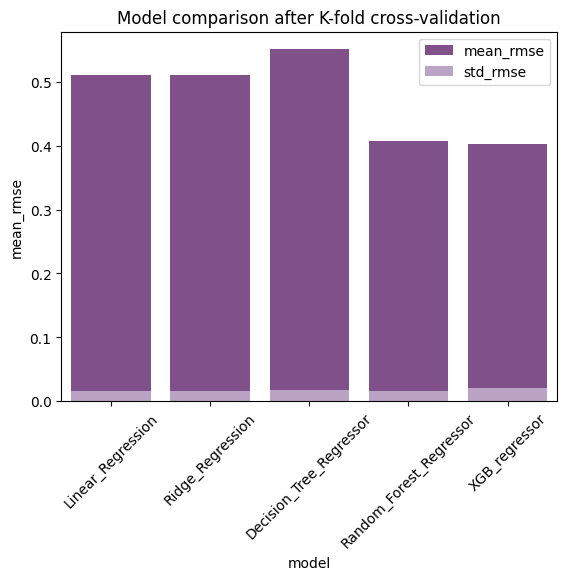

In [50]:
sns.barplot(data=df_score, x= 'model', y='mean_rmse', label = 'mean_rmse')
sns.barplot(data=df_score, x= 'model', y='std_rmse', label = 'std_rmse')
plt.title('Model comparison after K-fold cross-validation')
plt.xticks(rotation=45)

From these initial raw models without any tuning we can see that the Random forest and XGB regressors achieve the best mean rmse scores for the kfold validation, with the std having similar values for all models. The decision tree is the worst performer while linear and ridge regression achieve similar scores, taking into account the mean and the std

## 4. Model Hyperparameter Tuning

In this work the approach of tuning the models will be more automated using the available cross validation methods in scikit learn. In particular, for simple models (with the linear regression) will be tuned with GridSearchCV and the more complex models like random forest and xgboost regressors will be tuned first with RandomizedCV and then with GridSearchCV. 
This is inspired from the previous work that was referenced in the Readme file and extends the work in the previous course project where tuning was hardcoded and values were selected through plots and going step by step. We will be using the full_train datasets for this step which includes the validation and train sets and leave the test dataset for the final testing and model comparison.

In [51]:
df_full_train

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
1995,130,2,23500,950,377,2,310,0,1,1,2,2
1497,174,2,10500,800,289,2,1354,0,1,1,2,2
2763,164,1,19000,545,245,2,540,2,0,1,1,2
1351,188,1,20000,465,289,2,799,5,1,0,1,2
1862,185,2,17000,900,325,2,304,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,180,3,25000,1500,172,1,174,3,1,2,3,2
466,164,3,20000,1200,286,2,228,4,2,1,2,2
3092,187,2,20000,800,62,1,2106,1,1,2,2,0
3772,137,3,85000,3500,447,1,2009,1,1,1,3,0


In [52]:
y_full_train = np.log1p(df_full_train.rent)

del df_full_train['rent']

X_full_train = df_full_train.values

### Linear Regression

In [53]:
parameters = {'fit_intercept':(True, False), 'copy_X': (True, False), 'positive':(True, False)}

clf = GridSearchCV(lr, parameters)
clf.fit(X_full_train, y_full_train)
clf.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

These are also the default parameters for the linear regression.

### Ridge Regression

For ridge regression there are more parameters that could be tuned but remember it proved to have a similar initial score, applying the grid search takes much more time if we want to look into the whole space (~ 1min) and its probably more appropriate to use first a randomized search. I put it commented so it doesnt slow down the notebook execution, but you can try it out.

In [54]:
# parameters = {'alpha':[0, 0.1, 1, 10], 'fit_intercept':(True, False), 'copy_X': (True, False), 'positive':(True, False), 'max_iter':[None, 10, 100, 1000], 'tol':[1e-4, 1e-3, 1e-2, 1e-1], 'positive':(True, False)}
# clf = GridSearchCV(ridge, parameters)
# clf.fit(X_full_train, y_full_train)
# clf.best_params_

Grid search returns the following which shows that using a higher regularization value (alpha) yields better results. 

    {'alpha': 10,
    'copy_X': True,
    'fit_intercept': True,
    'max_iter': None,
    'positive': False,
    'tol': 0.0001}

In [55]:
parameters = {'alpha':[0, 0.1, 1, 10], 'fit_intercept':(True, False), 'copy_X': (True, False), 'positive':(True, False), 'max_iter':[None, 10, 100, 1000], 'tol':[1e-4, 1e-3, 1e-2, 1e-1], 'positive':(True, False)}
clf = RandomizedSearchCV(ridge, parameters)
clf.fit(X_full_train, y_full_train)
clf.best_params_

/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:346: ConvergenceWarning: The lbfgs solver did not converge. Try increasing max_iter or tol. Currently: max_iter=10 and tol=0.01
  warnings.warn(
/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:346: ConvergenceWarning: The lbfgs solver did not converge. Try increasing max_iter or tol. Currently: max_iter=10 and tol=0.01
  warnings.warn(
/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:346: ConvergenceWarning: The lbfgs solver did not converge. Try increasing max_iter or tol. Currently: max_iter=10 and tol=0.01
  warnings.warn(
/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:346: ConvergenceWarning: The lbfgs so

{'tol': 0.001,
 'positive': False,
 'max_iter': 10,
 'fit_intercept': True,
 'copy_X': False,
 'alpha': 0.1}

### Decision Tree Regressor

We will be looking into the most important parameters for the the dt regressor, plus some out of personal interest first with a randomized search and then with a grid. You can find more about the [parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [56]:
parameters = {'criterion':("squared_error", "friedman_mse", "absolute_error", "poisson"), 
              'splitter':("best", "random"),  
              'max_depth':[None, 5, 10, 20, 30, 40, 50, 100], 
              'min_samples_leaf':[1, 5, 10, 15, 20, 500, 100, 200], 
              }

clf = RandomizedSearchCV(dtr, parameters)
clf.fit(X_full_train, y_full_train)
clf.best_params_

{'splitter': 'best',
 'min_samples_leaf': 10,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [57]:
parameters = {'criterion':["squared_error"], 
              'splitter':["best"],  
              'max_depth':[None, 200, 500], 
              'min_samples_leaf':[18, 20, 30, 40, 80], 
              }

clf = GridSearchCV(dtr, parameters)
clf.fit(X_full_train, y_full_train)
clf.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_leaf': 30,
 'splitter': 'best'}

### Random Forest regressor

In [58]:
# RandomizedSearchCV
parameters = {
    'n_estimators': [10, 100, 200, 350, 500, 700, 850, 1000],
    'max_depth':[None, 5, 10, 20, 30, 37],
    'min_samples_split':[2, 10, 40, 100, 200, 300, 500, 1000],
    'min_samples_leaf':[1, 2, 10, 40, 100, 200, 300, 500, 1000],
    'bootstrap':(True, False),
}

clf = RandomizedSearchCV(rfr, parameters)
clf.fit(X_full_train, y_full_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': (True, False),
                                        'max_depth': [None, 5, 10, 20, 30, 37],
                                        'min_samples_leaf': [1, 2, 10, 40, 100,
                                                             200, 300, 500,
                                                             1000],
                                        'min_samples_split': [2, 10, 40, 100,
                                                              200, 300, 500,
                                                              1000],
                                        'n_estimators': [10, 100, 200, 350, 500,
                                                         700, 850, 1000]})

In [59]:
clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_depth': 30,
 'bootstrap': True}

In [60]:
# GridSearchCV

rfr = RandomForestRegressor(bootstrap = False, max_depth = None, n_jobs=16)
parameters = {
    'n_estimators': [350, 300, 310],
    'min_samples_split': [100, 80, 120],
    'min_samples_leaf': [5,10,15]
}

clf = GridSearchCV(rfr, parameters)
clf.fit(X_full_train, y_full_train)

GridSearchCV(estimator=RandomForestRegressor(bootstrap=False, n_jobs=16),
             param_grid={'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [100, 80, 120],
                         'n_estimators': [350, 300, 310]})

In [61]:
clf.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 350}

I wanted to test more values but due to the limitations on the speed of my current PC and time I limited the options in the GridSearchCV.

### XGB Regressor

Note: I used n_jobs=16 because I have 16 threads. I noticed that using 100 as a value in min child weight returned a lot of warnings for NaNs. Since the data is cleaned I thought it had to do with the parameters and I specified the scoring to rmse (negative because of the convention used see [doc](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)) but I still got the warnings, so I searched a bit and saw a similar issue on [stackoverflow](https://stackoverflow.com/questions/69005052/how-do-i-fix-fitfailedwarning-estimator-fit-failed-the-score-on-this-train-t) which lead me to the conclusion that it must be due to the parameters chosen initially and the "limits" of the dataset I have in terms of its dimensions. I think that some of the trees led to no values under some terminal node and thus I had the warnings for NaNs. I initially used: 'min_child_weight': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]. Remember that this controls the number of observations per leaf node so I thought that I might limit this since it might lead to models that try to keep more observations per leaf (given also their size) than the availble ones leading to this kind of warnings. I am not 100% that this logic is correct but the warnings were gone after removing the 100 from the list.

TLDR; I had warnings for NaNs popping up for the xgbregressor parameter search. I removed the 100 as a possible value for the min_child weight and the warnings were gone.

EDIT: The warnigns came back after a re-run of the notebook.

In [62]:
xgbr = XGBRegressor(n_jobs=16)

parameters = {
    'eta': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 5],
    'max_depth':[None, 5, 10, 20, 30],
    'min_child_weight': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]
    
}

clf = RandomizedSearchCV(xgbr, parameters, scoring='neg_mean_squared_error')
clf.fit(X_full_train, y_full_train)

/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/gverikios/.local/share/virtualenvs/House_Rent_Prediction-dMCN_mMg/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scorin

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=16,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'eta': [0.001, 0.01, 0.1, 0.3, 0.5, 1,
                                                2, 5],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'min_child_weight': [0.1, 0.2, 0.5, 1,
                                                             2, 5, 10, 20,
                                                             50]},
                   scoring='neg_mean_squared_error')

In [63]:
clf.best_params_

{'min_child_weight': 20, 'max_depth': 5, 'eta': 0.1}

NOTE: It takes about 6 mins to finish the GridSearch in the following code.

In [64]:
xgbr = XGBRegressor(n_jobs=16)

parameters = {
    'eta': [0.05, 0.1, 0.15],
    'max_depth':[None, 2, 5, 7],
    'min_child_weight': [1.5, 2, 2.5]
    
}

clf = GridSearchCV(xgbr, parameters, scoring='neg_mean_squared_error')
clf.fit(X_full_train, y_full_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=16, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'eta': [0.05, 0.1, 0.15], 'max_depth': [None, 2, 5, 7],
                         'min_child_weight': [1.5, 2, 2.5]},
             scoring='neg_mean_squared_error')

In [65]:
clf.best_params_

{'eta': 0.05, 'max_depth': None, 'min_child_weight': 1.5}

## 5. Final Model Training and comparison

Now we will train the models using the best parameters that we tracked down with the cross validation and select the one the one that performs best on the test dataset.

In [66]:
lr = LinearRegression()
ridge = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, positive=False, tol=0.0001)
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=None, min_samples_leaf=30, splitter='best')
rfr = RandomForestRegressor(bootstrap = False, max_depth = None, 
                            min_samples_leaf= 5, min_samples_split = 100, n_estimators = 350)
xgbr = XGBRegressor(min_child_weight= 1.5, max_depth= None, eta= 0.05, n_jobs=16)

In [67]:
models_reg = [lr, ridge, dtr, rfr, xgbr]
rmse_scores = []
for model in models_reg:
    model.fit(X_full_train, y_full_train)
    y_pred = model.predict(X_test)
    score = rmse(y_pred, y_test)
    rmse_scores.append(score)
    print("For model %s: RMSE is : %.5f" % (model, score))

For model LinearRegression(): RMSE is : 0.47789
For model Ridge(alpha=10): RMSE is : 0.47798
For model DecisionTreeRegressor(min_samples_leaf=30): RMSE is : 0.40747


For model RandomForestRegressor(bootstrap=False, min_samples_leaf=5,
                      min_samples_split=100, n_estimators=350): RMSE is : 0.40740
For model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.05, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=1.5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=16, num_parallel_tree=None, ...): RMSE is : 0.36237


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear_Regression'),
  Text(1, 0, 'Ridge_Regression'),
  Text(2, 0, 'Decision_Tree_Regressor'),
  Text(3, 0, 'Random_Forest_Regressor'),
  Text(4, 0, 'XGB_regressor')])

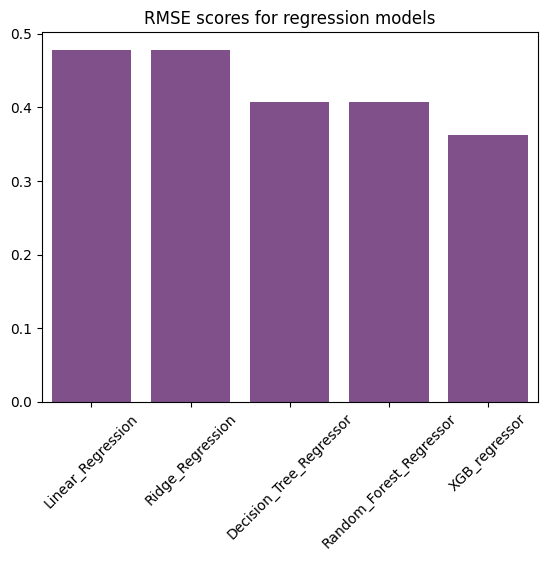

In [68]:
sns.barplot(x=models, y=rmse_scores)
plt.title("RMSE scores for regression models")
plt.xticks(rotation=45)

Based on the RMSE the XBG regressor achieves the best rmse score. Interestingly enough, the decsion tree achieves similar score to the random forest, wich could be also due to the fact that they share the same concept at their base.

In [69]:
y_pred = xgbr.predict(X_test)

Heres what the actual vs predicted prices look like on a hist plot

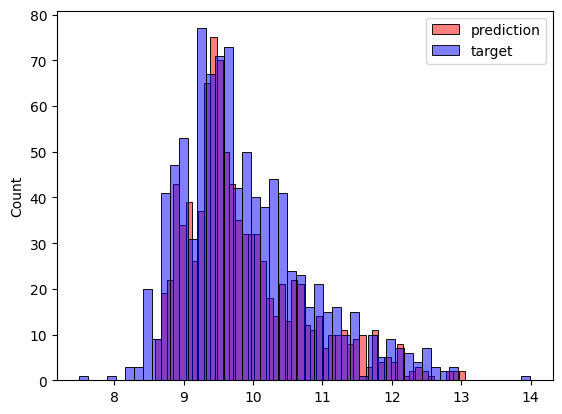

In [ ]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='prediction')
sns.histplot(y_test, color='blue', alpha=0.5, bins=50, label='target')
plt.legend()

NB: Remember that the predictions are made based on the log values for the rents and if we need to convert to see the actual price.

## 6. Remarks

- Categorical features were treated using the label encoder. This made things less complex in terms of preparing the dataset. It could be of interest to make a follow-up where different techniques are combined like label encoder for the features with high cardinality and one-hot-encoding for the rest and see how the scores might change.
- Due to computing power limitation and time restrictions GridSearch's were a bit limited in terms of the grid space, if there's a follow-up it can be on a wider grid space. For example I could have used the CUDA toolkit and utilize the cpu for xgboost, which could have made things a lot faster at least for that particular model.

#### Code Testing

just some testing for the scripts and the predictions they return

In [73]:
df_test.iloc[0]

posted_on             174
bhk                     2
size                 1100
floor                 247
area_type               2
area_locality         875
city                    0
furnishing_status       2
tenant_preferred        1
bathroom                2
point_of_contact        2
Name: 1566, dtype: int64

In [122]:
listing = {'posted_on':             174,
'bhk':                     2,
'size':                 1100,
'floor':                 247,
'area_type':               2,
'area_locality':         875,
'city':                    0,
'furnishing_status':       2,
'tenant_preferred':        1,
'bathroom':                2,
'point_of_contact':        2
}

In [123]:
x = np.array(list(listing.values()))
x = x.reshape(1, -1)

In [124]:
xgbr.predict(x)

array([9.616724], dtype=float32)

In [127]:
y_pred[0]

9.616724

In [128]:
np.expm1(y_pred[0])

15012.784